In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [2]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.rename(columns={"Annual Income (k$)":"Income","Spending Score (1-100)":"Score"},inplace=True)

In [5]:
df.head()

,CustomerID,Genre,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.drop(columns=['CustomerID','Genre','Age'],inplace=True)

In [7]:
df.isnull().sum()

Income    0
Score     0
dtype: int64

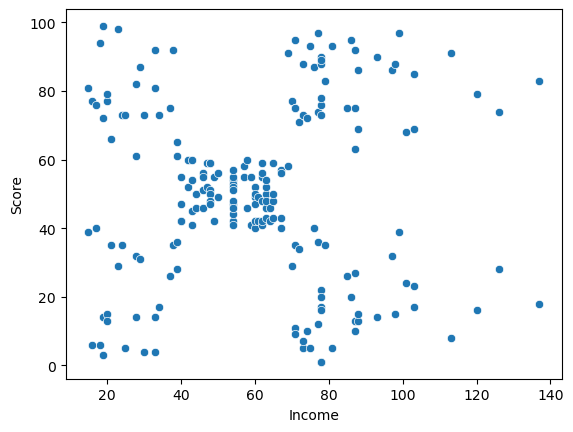

In [8]:
sns.scatterplot(x=df['Income'],y=df['Score'])
plt.show()

In [9]:
X=df

In [10]:
wcss=[]

for k in range(1,11):
    from sklearn.cluster import KMeans
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
print(wcss)    

[269981.28, 181363.59595959593, 106348.37306211122, 73679.78903948836, 44448.4554479337, 37265.86520484346, 30273.394312070042, 25063.6525158641, 21838.86369282892, 19721.547527312738]


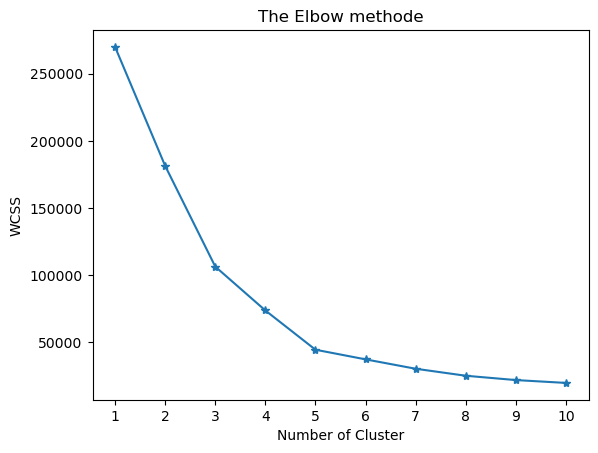

In [11]:
plt.plot(range(1,11),wcss,marker='*')
plt.xticks(range(1,11))
plt.title("The Elbow methode")
plt.xlabel("Number of Cluster")
plt.ylabel("WCSS")
plt.show()